<font size=10><b>Data Preprocessing - Assignment II</b></font>

For this exercise, please download the following dataset: [Housing prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv)

Look at the [Data Dictionary](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=data_description.txt)

<div class="alert alert-info"><b>Note:</b> Always document all of the processes you are doing to your data, in a jupyter notebook. Also document the DataFrame shape after every operation, and explain the thought behind each step you took. You need to generate a report - write the logic behind every step you take, give your conclusions in a paragraph, and make everything very readable</div>

# Exercise:

## 1. Load the dataset into a pandas DataFrame.



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# your code here
df = pd.read_csv('train (3).csv')
df.shape # (1460, 81)

(1460, 81)

## 2. Split the train set given into a train and a validation set, and perform the following tasks on both sets

In [3]:
# your code here
target = 'SalePrice'
features = set(df.columns) - {target}

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
# split the given train set randomly with 20% of the data on the test set.
# We use random_state to keep the same shuffle
X_train.shape, X_test.shape

<ipython-input-3-4f18426b0572>:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X = df[features]


((1168, 80), (292, 80))

## 3. Missing Values:
### a. Which columns have missing values? How many missing values are there (per column)?


In [4]:
# your code here

# train set :
column = []
miss_values = []
perc_values = []
for columns in X_train.columns:
  missing_values = X_train[columns].isna().sum()
  if missing_values>0:
    column.append(columns)
    miss_values.append(missing_values)
    perc_values.append((X_train[columns].isna().mean()*100).round(3))

column = pd.Series(column, name = 'features')
miss_values = pd.Series(miss_values, name = 'number_of_missing_values')
perc_values = pd.Series(perc_values, name = '%_of_missing_values')
df_train_miss_values = pd.concat([column, miss_values, perc_values], axis = 1)
df_train_miss_values = df_train_miss_values.sort_values(by = ['%_of_missing_values'], ascending = False ).reset_index(drop = True)

df_train_miss_values

,features,number_of_missing_values,%_of_missing_values
0,PoolQC,1162,99.486
1,MiscFeature,1122,96.062
2,Alley,1094,93.664
3,Fence,935,80.051
4,FireplaceQu,547,46.832
5,LotFrontage,217,18.579
6,GarageYrBlt,64,5.479
7,GarageFinish,64,5.479
8,GarageQual,64,5.479
9,GarageCond,64,5.479


In [5]:
# test set :
column = []
miss_values = []
perc_values = []
for columns in X_test.columns:
  missing_values = X_test[columns].isna().sum()
  if missing_values>0:
    column.append(columns)
    miss_values.append(missing_values)
    perc_values.append((X_test[columns].isna().mean()*100).round(3))

column = pd.Series(column, name = 'features')
miss_values = pd.Series(miss_values, name = 'number_of_missing_values')
perc_values = pd.Series(perc_values, name = '%_of_missing_values')
df_test_miss_values = pd.concat([column, miss_values, perc_values], axis = 1)
df_test_miss_values = df_test_miss_values.sort_values(by = ['%_of_missing_values'], ascending = False ).reset_index(drop = True)

df_test_miss_values

,features,number_of_missing_values,%_of_missing_values
0,PoolQC,291,99.658
1,MiscFeature,284,97.260
2,Alley,275,94.178
3,Fence,244,83.562
4,FireplaceQu,143,48.973
5,LotFrontage,42,14.384
6,GarageFinish,17,5.822
7,GarageQual,17,5.822
8,GarageCond,17,5.822
9,GarageYrBlt,17,5.822


 ### b. Choose 10 interesting columns from the previous clause. Per column, deal with the missing values (drop or impute). Explain you business logic behind each step you take per column.


Based on the percentage we got of nan values per feature, we see that we have more than 80% of nan values for 4 features. So we can drop those features as they wont give us relevant informations.
We can also drop 'FireplaceQu' as we have 49% of nan values.

For all the features starting by 'Garage', we see that we have the same amount of nan values, which mean that the corresponding house do not have Garage. We do not have too much nan values (less than 6%) and as we have a continuous feature 'GarageYrBlt' where we can not find a relevant value to fill nan values with, we prefer to delete those rows.

In [6]:
#1. PoolQC, MiscFeature, Alley, Fence, FireplaceQu : We delete those features as we have too many nan values
X_train.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace = True)
X_test.drop(columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], inplace = True)

In [7]:
#2. 'GarageCond','GarageFinish','GarageType','GarageYrBlt','GarageQual' : We drop nan values
X_train.dropna(subset = ['GarageCond','GarageFinish','GarageType','GarageYrBlt','GarageQual'], inplace = True)
X_test.dropna(subset = ['GarageCond','GarageFinish','GarageType','GarageYrBlt','GarageQual'], inplace = True)

### c. What is the data shape now? If you dropped rows - did you decrease the number of rows significantly?


In [8]:
# your code here
X_train.shape, X_test.shape
print(f"The shape of X_train is {X_train.shape} and the shape if X_test is {X_test.shape}")
print(f"We dropped {(80-X_train.shape[1])/80 *100} % of features from X_train and {(80-X_test.shape[1])/80 *100} % of features from X_test")
print(f"We dropped {(1168-X_train.shape[0])/1168 *100:.2f} % of rows from X_train and {(292-X_test.shape[0])/292 *100:.2f} % of rows from X_test")

The shape of X_train is (1104, 75) and the shape if X_test is (275, 75)
We dropped 6.25 % of features from X_train and 6.25 % of features from X_test
We dropped 5.48 % of rows from X_train and 5.82 % of rows from X_test


Before dealing with nan values, the shape of X_train was (1168, 80) and the shape of X_test was (292, 80).

After dealing with nan values, as we deleted features and a few rows, we have (1104, 75) for the shape of X_train and (275, 75) for the shape of X_test.


 ### d. Plot the distribution of your imputed features. What happened to the distribution? Explain the pros and cons of your decisions.

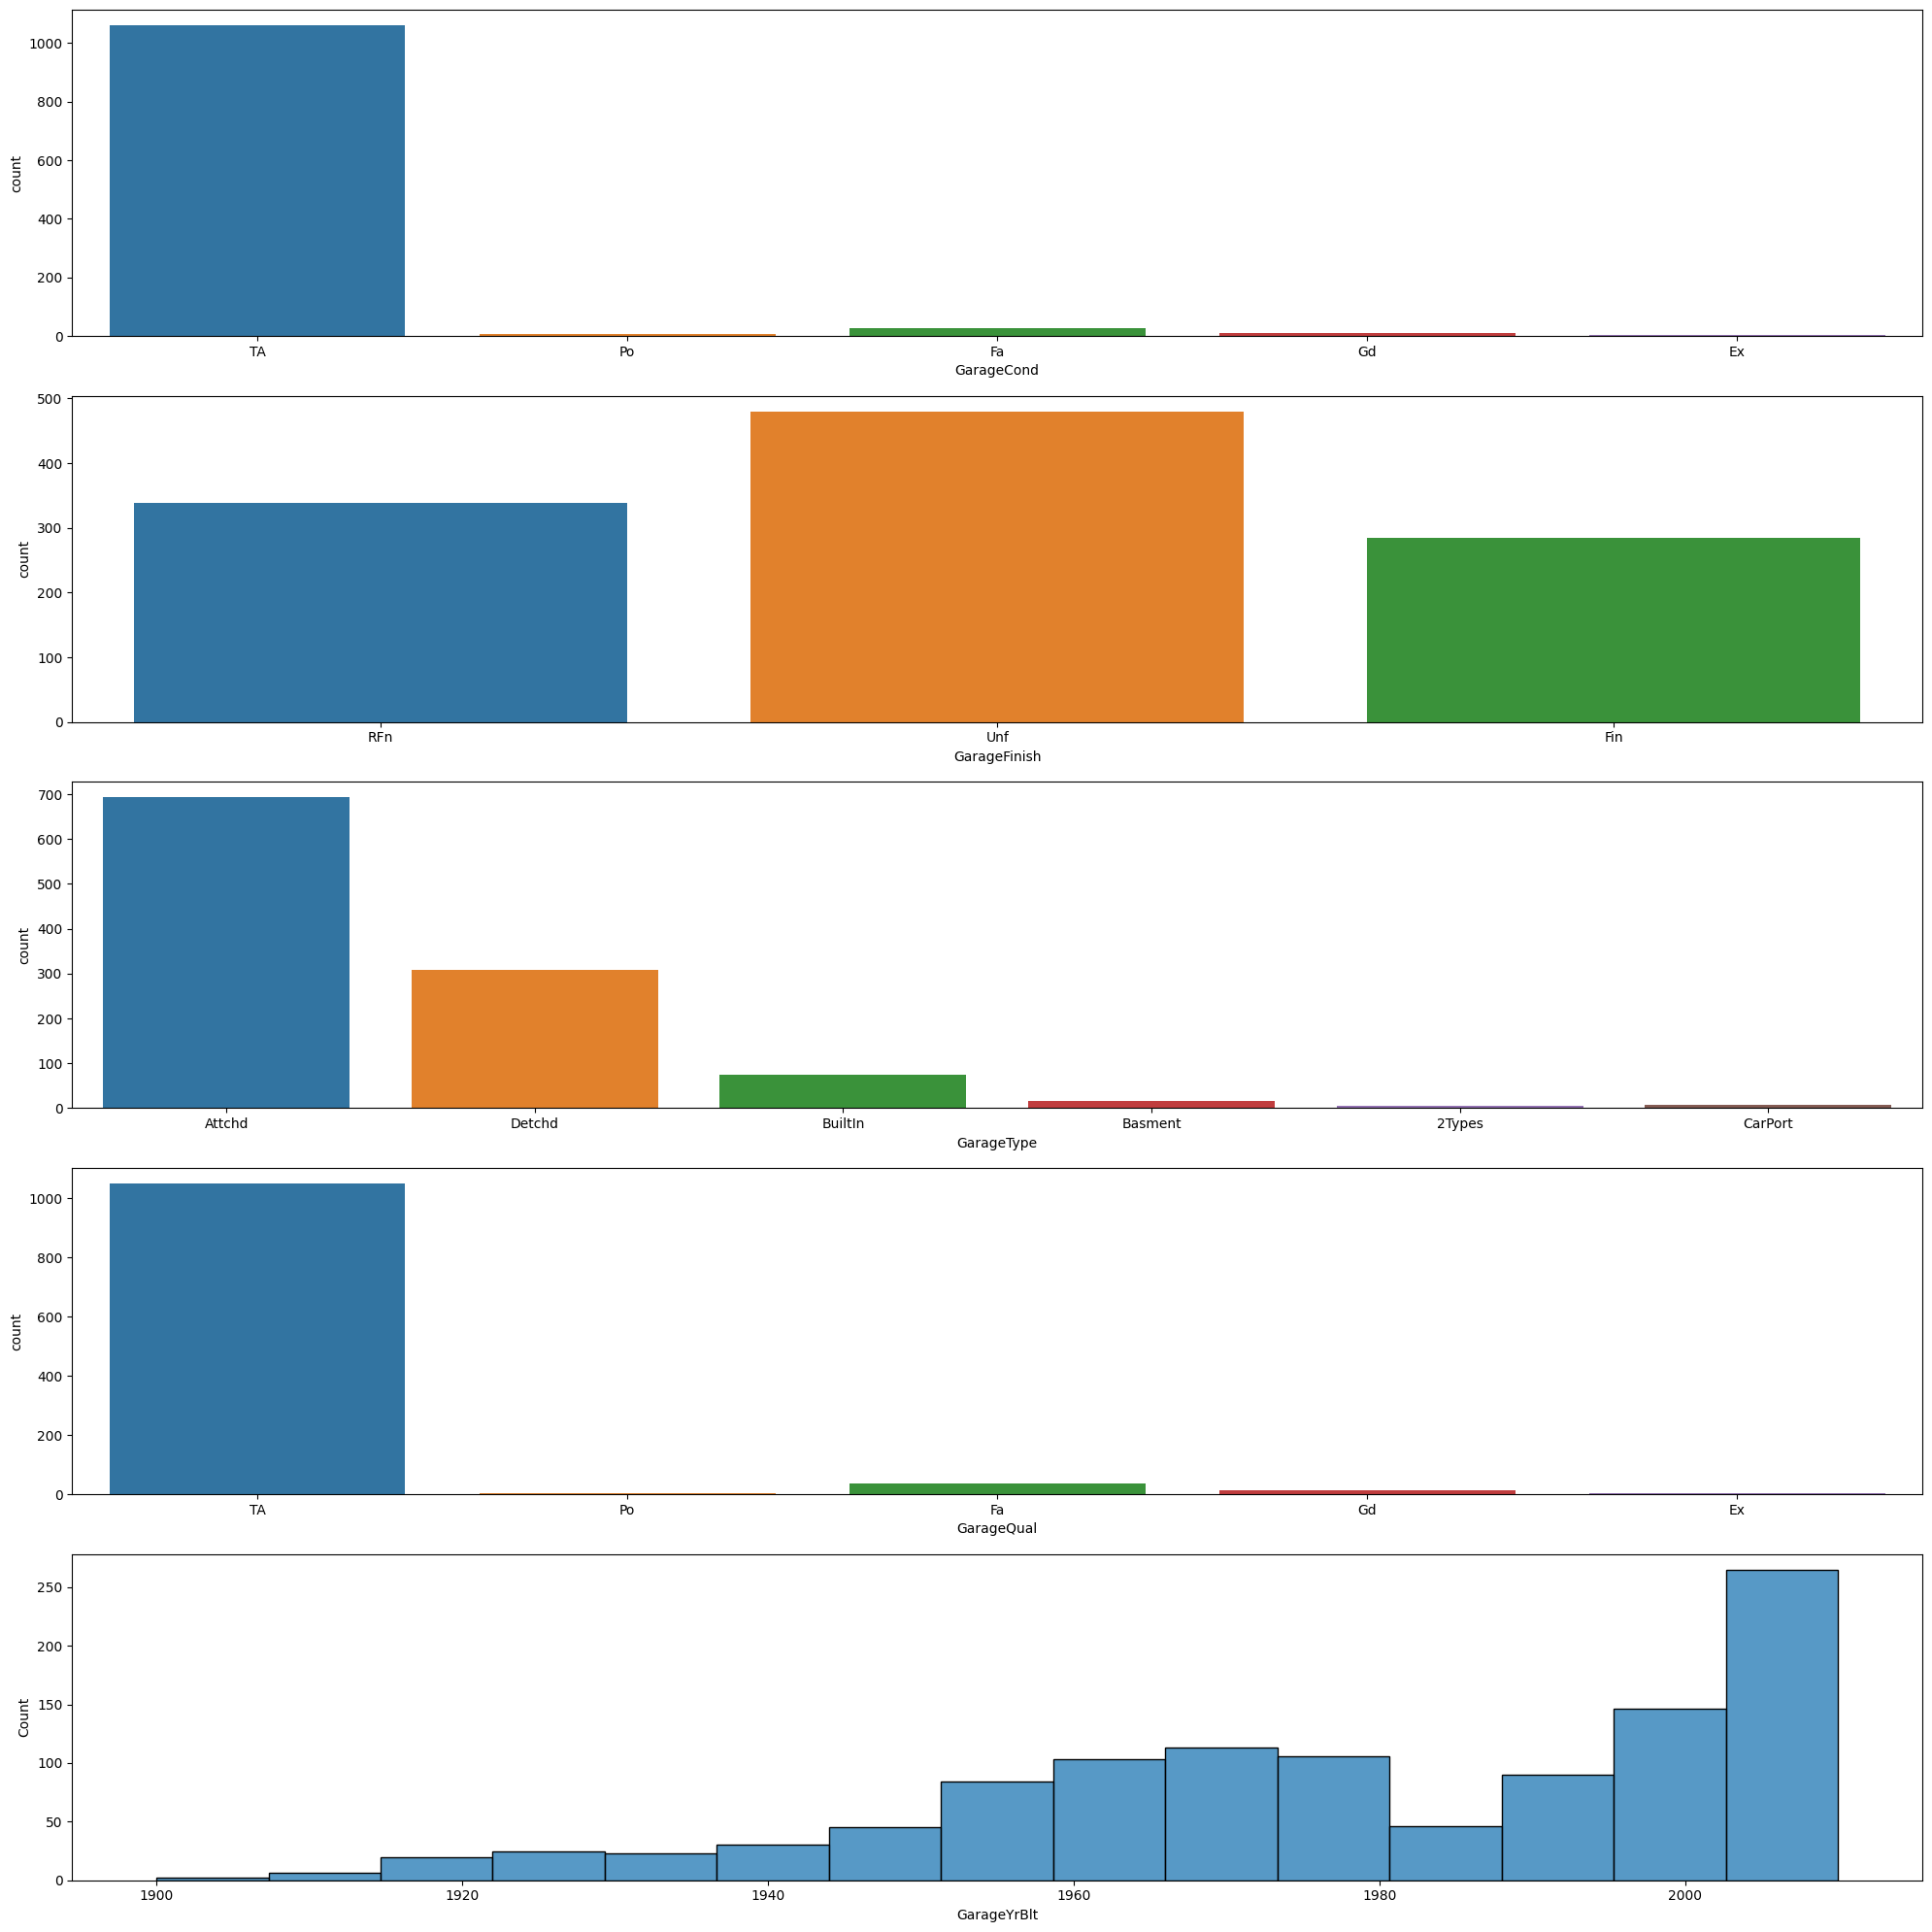

In [9]:
# your code here

cat_features = ['GarageCond','GarageFinish', 'GarageType','GarageQual']
num_features = ['GarageYrBlt']
features = cat_features + num_features
f,axes = plt.subplots(5,1, figsize = (20,20))
axes = axes.flatten()
for index, column in enumerate(features):
  if column in cat_features:
    sns.countplot(x = X_train[column], ax = axes[index])
  else:
    sns.histplot(X_train[column], ax = axes[index])


plt.tight_layout()
plt.show()

As we deleted a few rows for the Garage features, we give a more important impact to the dominant category per feature.
For example, the category 'TA'for GarageQual and GarageCond is predominant on the graph.
Same for 'Attchd' for GarageType.
It makes the distribution of the feature more distorted.
This can be a cons of deleting rows as we will give more weight to the main values of each feature.


However, a main pros is that we will be able to work with each feature without taking care of nan values.
Moreover, we just deleted a few rows so it wont impact the general dataset and wont change our results.


## 4. Outliers:
### a. Plot the distributions of features. What are features that have values that can be considered as outliers? (Submit only relevant plots)


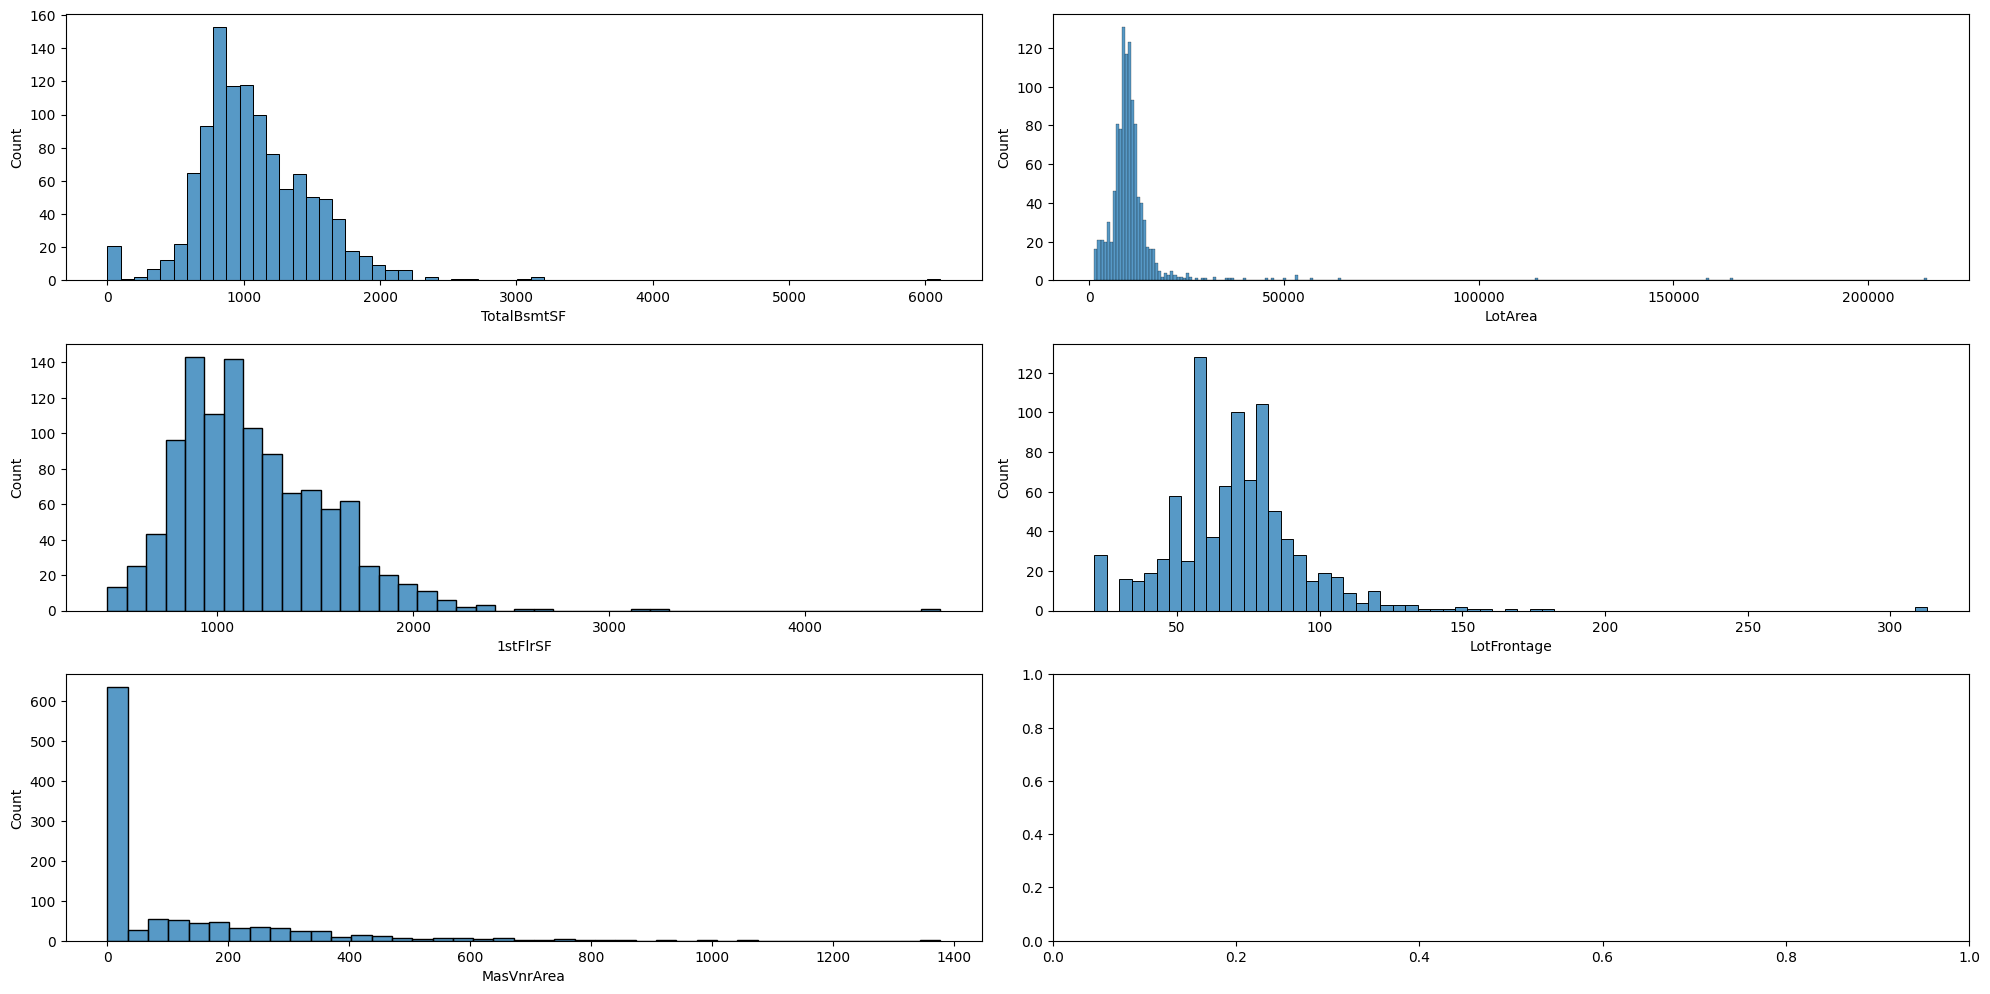

In [10]:
# your code here
f,axes = plt.subplots(3,2, figsize = (20,10))
feature_with_outliers = ['TotalBsmtSF', 'LotArea', '1stFlrSF', 'LotFrontage','MasVnrArea']
axes = axes.flatten()
for index, column in enumerate(feature_with_outliers):
  sns.histplot(x = X_train[column], ax = axes[index])

plt.tight_layout()
plt.show()


### b. Remove the outliers - by one of the methods that we discussed in the lecture. mention the business logic behind each decision you make.

In [11]:
# your code here
# TotalBsmtSF
# We have outliers that are not interesting for our data (values are extreme) so we prefer to drop them.
# We use the std method because the data is normally distributed

mean_totbsmtsf = X_train.TotalBsmtSF.mean()
std_totbsmtsf = X_train.TotalBsmtSF.std()

lower_bound = max(0,mean_totbsmtsf - 3 * std_totbsmtsf)
upper_bound = mean_totbsmtsf + 3 * std_totbsmtsf

within_bounds_train = X_train.TotalBsmtSF.between(lower_bound,upper_bound)
within_bounds_test = X_test.TotalBsmtSF.between(lower_bound,upper_bound)


X_train = X_train[within_bounds_train].reset_index(drop = True)
X_test = X_test[within_bounds_test].reset_index(drop = True)


In [12]:
# LotArea
# We have outliers that are not interesting for our data (values are extreme) so we prefer to drop them.
# We use the std method because the data is normally distributed
mean_la = X_train.LotArea.mean()
std_la = X_train.LotArea.std()

lower_bound_la = max(0, mean_la - 3 * std_la)
upper_bound_la = mean_la + 3 * std_la

within_bound_la_train = X_train.LotArea.between(lower_bound_la, upper_bound_la)
within_bound_la_test = X_test.LotArea.between(lower_bound_la,upper_bound_la)

X_train = X_train[within_bound_la_train].reset_index(drop = True)
X_test = X_test[within_bound_la_test].reset_index(drop = True)




In [13]:
#1stFlrSF
# We have outliers that are not interesting for our data (values are extreme) so we prefer to drop them.
# We use the std method because the data is normally distributed
mean_stflr = X_train['1stFlrSF'].mean()
std_stflr = X_train['1stFlrSF'].std()

lower_bound_stflr = max(0, mean_stflr - 3 * std_stflr)
upper_bound_stflr = mean_stflr + 3 * std_stflr

within_bound_stflr_train = X_train['1stFlrSF'].between(lower_bound_stflr, upper_bound_stflr)
within_bound_stflr_test = X_test['1stFlrSF'].between(lower_bound_stflr,upper_bound_stflr)

X_train = X_train[within_bound_stflr_train].reset_index(drop = True)
X_test = X_test[within_bound_stflr_test].reset_index(drop = True)




In [14]:
#LotFrontage

# We have outliers that are not interesting for our data (values are extreme) so we prefer to drop them.
# We use the std method because the data is normally distributed

mean_lf = X_train.LotFrontage.mean()
std_lf = X_train.LotFrontage.std()

lower_bound = max(0, mean_lf - 3 * std_lf)
upper_bound = mean_lf + 3 * std_lf

within_bound_lf_train = X_train.LotFrontage.between(lower_bound,upper_bound)
within_bound_lf_test = X_test.LotFrontage.between(lower_bound,upper_bound)

X_train = X_train[within_bound_lf_train]
X_test = X_test[within_bound_lf_test]



In [15]:
#MasVnrArea
# We have outliers that are not interesting for our data so we prefer to drop them
# We do not recognize a specific distribution for our data so we use the IQR method.

Q1 = X_train.MasVnrArea.quantile(0.25)
Q3 = X_train.MasVnrArea.quantile(0.75)

IQR = Q3 - Q1

lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

within_bound_iqr_train = X_train.MasVnrArea.between(lower_bound_iqr,upper_bound_iqr)
within_bound_iqr_test = X_test.MasVnrArea.between(lower_bound_iqr,upper_bound_iqr)

X_train = X_train[within_bound_iqr_train]
X_test = X_test[within_bound_iqr_test]



### c. What is the data shape now? If you dropped rows - did you decrease the number of rows significantly?

In [16]:
# your code here
print(X_train.shape ,X_test.shape)
print(f" We deleted {(1104 - X_train.shape[0])/1104*100:.2f} % of rows from X_train and {(275 - X_test.shape[0])/275*100:.2f} % of rows from X_test")


(816, 75) (211, 75)
 We deleted 26.09 % of rows from X_train and 23.27 % of rows from X_test


We decreased quite significantly the number of rows on our dataset. This is due to the fact that 'LotFrontage' has around 20% of outliers.
Before, we had 1104 rows on X_train, now we have 808.
Before, we had 275 rows on X_test, now we have 207.
We deleted around 25% of rows on each dataset.
It may be a problem but the std method is the best one I found to deal with outliers of LotFrontage.